/tmp/ipykernel_18435/3849742490.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_parks = pd.read_sql(query_park, conn)
/tmp/ipykernel_18435/3849742490.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rental = pd.read_sql(query_rental, conn)


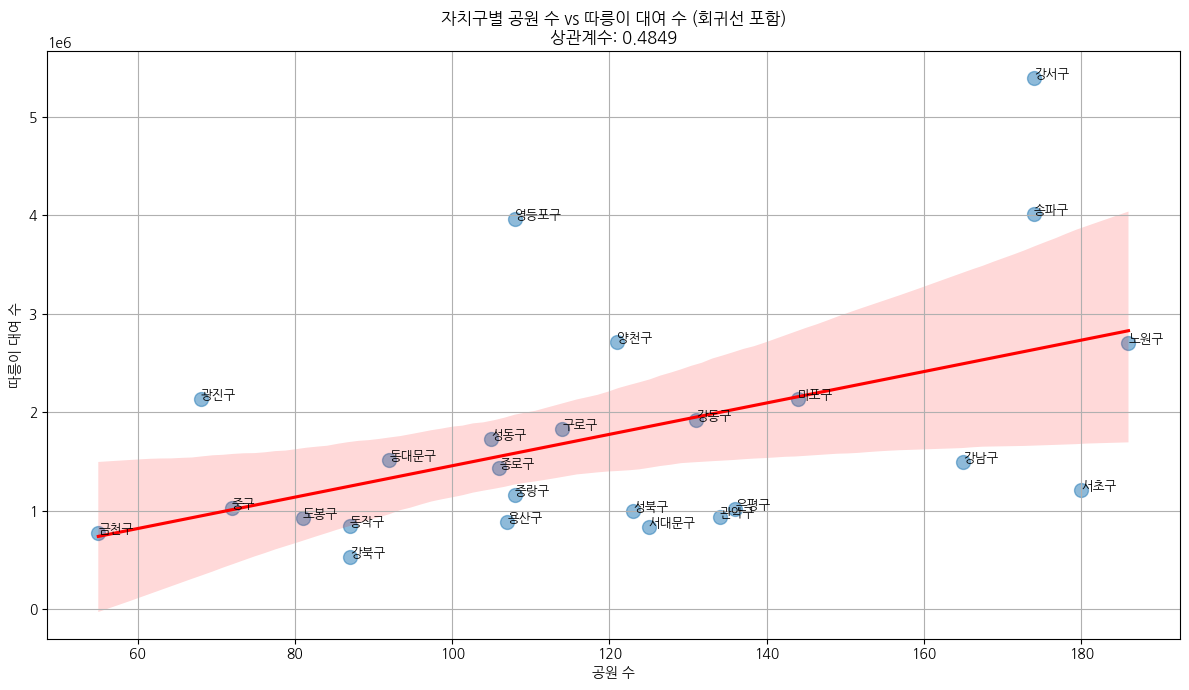

In [ ]:
import pandas as pd
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib  # 📌 한글 자동 적용

conn = mysql.connector.connect(
    host="host",
    port=0000,
    user="user",
    password="password",
    database="project1"
)

# ✅ 공원 개수 데이터
query_park = """
SELECT gu_name, num_parks
FROM parks_by_gu;
"""
df_parks = pd.read_sql(query_park, conn)

# ✅ 따릉이 대여 수 데이터
query_rental = """
SELECT station_gu AS gu_name, SUM(rental_count) AS total_rentals
FROM rental_hourly_gu_summary
GROUP BY station_gu;
"""
df_rental = pd.read_sql(query_rental, conn)

conn.close()

# ✅ 병합
merged_df = pd.merge(df_parks, df_rental, on="gu_name")

# ✅ 상관계수 계산
corr = merged_df[["num_parks", "total_rentals"]].corr().iloc[0, 1]

# ✅ 시각화
plt.figure(figsize=(12, 7))
sns.regplot(
    data=merged_df,
    x="num_parks",
    y="total_rentals",
    scatter_kws={"s": 100, "alpha": 0.5},
    line_kws={"color": "red"},
    ci=95
)

# ✅ 자치구 이름 표시
for _, row in merged_df.iterrows():
    plt.text(row["num_parks"], row["total_rentals"], row["gu_name"], fontsize=9)

plt.title(f"자치구별 공원 수 vs 따릉이 대여 수 (회귀선 포함)\n상관계수: {corr:.4f}")
plt.xlabel("공원 수")
plt.ylabel("따릉이 대여 수")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sqlalchemy import create_engine

# ✅ CSV 불러오기
df = pd.read_csv("/home/kbj/Downloads/자치구별 공원.csv", encoding='utf-8')  # 또는 'utf-8'

# ✅ 컬럼명 영문으로 변경
df.columns = ["gu_name", "num_parks", "total_area_1000m2"]

# ✅ MySQL 연결 설정
conn = mysql.connector.connect(
    host="host",
    port=0000,
    user="user",
    password="password",
    database="project1"
)

engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}")

# ✅ MySQL에 저장
df.to_sql("parks_by_gu", con=engine, if_exists="replace", index=False)

print("✅ 'parks_by_gu' 테이블로 MySQL에 저장 완료!")


✅ 'parks_by_gu' 테이블로 MySQL에 저장 완료!


In [ ]:

# ✅ MySQL 연결
conn = mysql.connector.connect(
    host="host",
    port=0000,
    user="user",
    password="password",
    database="project1"
)

# ✅ JOIN 쿼리 실행 (gu_name 기준)
query = """
    SELECT 
        g.gu_id,
        p.gu_name,
        p.num_parks
    FROM parks_by_gu p
    JOIN gu g ON p.gu_name = g.gu_name
"""

# ✅ pandas로 가져오기
df_joined = pd.read_sql(query, conn)

# ✅ 확인
print(df_joined.head())

# ✅ 저장 (선택)
df_joined.to_csv("parks_by_gu_with_id.csv", index=False, encoding="utf-8-sig")

# ✅ 연결 종료
conn.close()


   gu_id gu_name  num_parks
0     23     종로구        106
1     24      중구         72
2     21     용산구        107
3     16     성동구        105
4      6     광진구         68


/tmp/ipykernel_19204/176230113.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_joined = pd.read_sql(query, conn)
